In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(500, 9)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.drop(columns=['Serial No.'])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [9]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [10]:
x

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


In [11]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


In [15]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2,random_state=1)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xtr=scaler.fit_transform(xtr)
xte=scaler.transform(xte)

In [30]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [38]:
model=Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='linear'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [42]:
hitory=model.fit(tf.constant(xtr[:, 1:], dtype=tf.float32), tf.constant(ytr.values.reshape(-1,1), dtype=tf.float32), epochs=30, validation_split=0.2)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0080 - val_loss: 0.0072
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0069 - val_loss: 0.0071
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0070 - val_loss: 0.0070
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0074 - val_loss: 0.0069
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0070 - val_loss: 0.0067
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0065 - val_loss: 0.0066
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0062 - val_loss: 0.0066
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0065 - val_loss: 0.0065
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0059 - val_loss: 0.0064
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.00

In [43]:
y_pred=model.predict(tf.constant(xte[:, 1:], dtype=tf.float32))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [44]:
from sklearn.metrics import r2_score
r2_score(yte,y_pred)

0.746804033926721

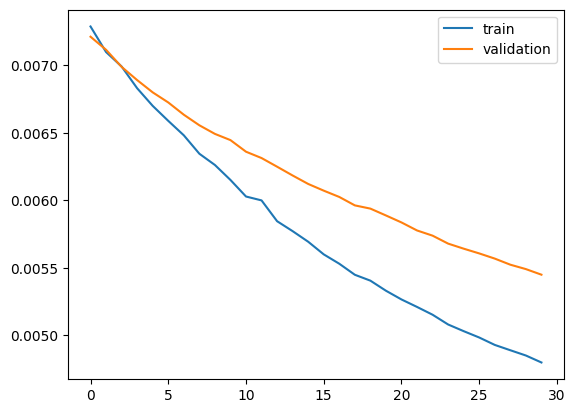

In [45]:
plt.plot(hitory.history['loss'])
plt.plot(hitory.history['val_loss'])
plt.legend(['train','validation'])
plt.show()